In [3]:
import pandas as pd
data = pd.read_csv('obesity_level.csv')  
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,normal_weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


In [4]:
data.drop(columns=['id'], inplace=True)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
X = data.drop(columns=['0be1dad'])
y = data['0be1dad']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

predictions_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, predictions_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.8421813276808942


In [10]:
report_dt = classification_report(y_test, predictions_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      0.87      0.88      1257
     Obesity_Type_I       0.81      0.80      0.81      1457
    Obesity_Type_II       0.94      0.94      0.94      1610
   Obesity_Type_III       0.99      0.99      0.99      2015
 Overweight_Level_I       0.68      0.65      0.66      1213
Overweight_Level_II       0.69      0.73      0.71      1263
      normal_weight       0.79      0.80      0.79      1564

           accuracy                           0.84     10379
          macro avg       0.83      0.83      0.83     10379
       weighted avg       0.84      0.84      0.84     10379



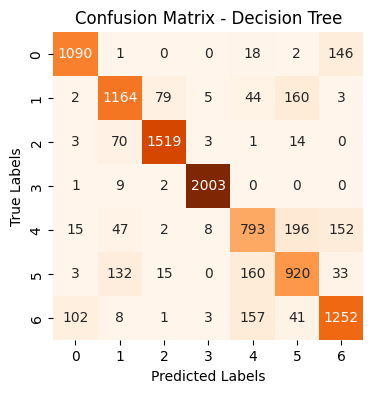

In [11]:
cm_dt = confusion_matrix(y_test, predictions_dt)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Decision Tree Accuracy: 0.7623085075633491


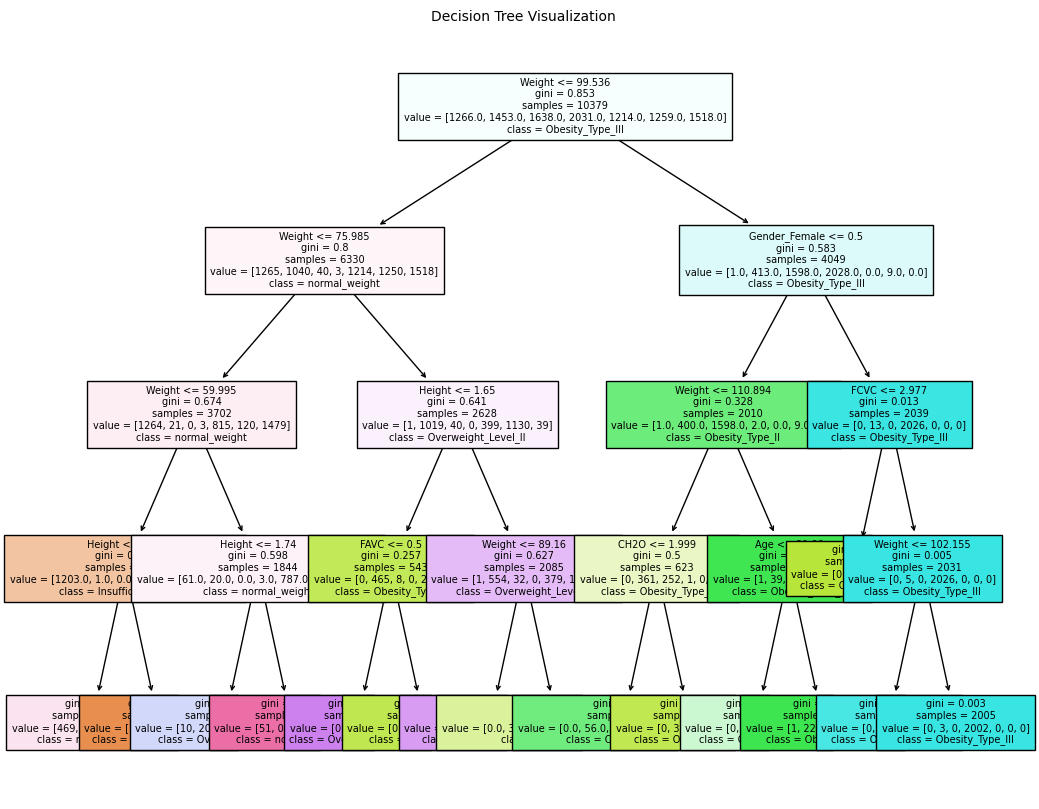

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=4)

dt_classifier.fit(X_train, y_train)

predictions_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, predictions_dt)
print("Decision Tree Accuracy:", accuracy_dt)

plt.figure(figsize=(12, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=dt_classifier.classes_, fontsize=7)
plt.title("Decision Tree Visualization", fontsize=10)
plt.show()

In [29]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

X_ordinal = ordinal_encoder.fit_transform(X)

X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ordinal, y, test_size=0.3, random_state=42)


In [30]:
clf_ord = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_ord.fit(X_train_ord, y_train_ord)

y_pred_ord = clf_ord.predict(X_test_ord)

accuracy_ord = accuracy_score(y_test_ord, y_pred_ord)
print(f'Accuracy on Ordinal Data: {accuracy_ord}')

# Confusion matrix for ordinal data
conf_matrix_ord = confusion_matrix(y_test_ord, y_pred_ord)
print('Confusion Matrix for Ordinal Data:')
print(conf_matrix_ord)


Accuracy on Ordinal Data: 0.8423249839434811
Confusion Matrix for Ordinal Data:
[[ 666    2    0    0    7    3   77]
 [   2  696   31    7   40   78    4]
 [   0   39  957    3    0    6    0]
 [   1    4    1 1201    0    0    0]
 [   5   33    1    2  496  108   88]
 [   2   93   12    1  116  514   25]
 [  65    3    0    0  102   21  716]]


In [28]:
import pandas as pd

comparison = {
    'Task': ['Task A (Categorical)', 'Task B (Ordinal)'],
    'Accuracy': [accuracy_dt, accuracy_ord],
    'Confusion Matrix': [cm_dt, conf_matrix_ord]
}

comparison_df = pd.DataFrame(comparison)
print(comparison_df)


                   Task  Accuracy  \
0  Task A (Categorical)  0.762309   
1      Task B (Ordinal)  0.842325   

                                    Confusion Matrix  
0  [[1090, 1, 0, 0, 18, 2, 146], [2, 1164, 79, 5,...  
1  [[666, 2, 0, 0, 7, 3, 77], [2, 696, 31, 7, 40,...  


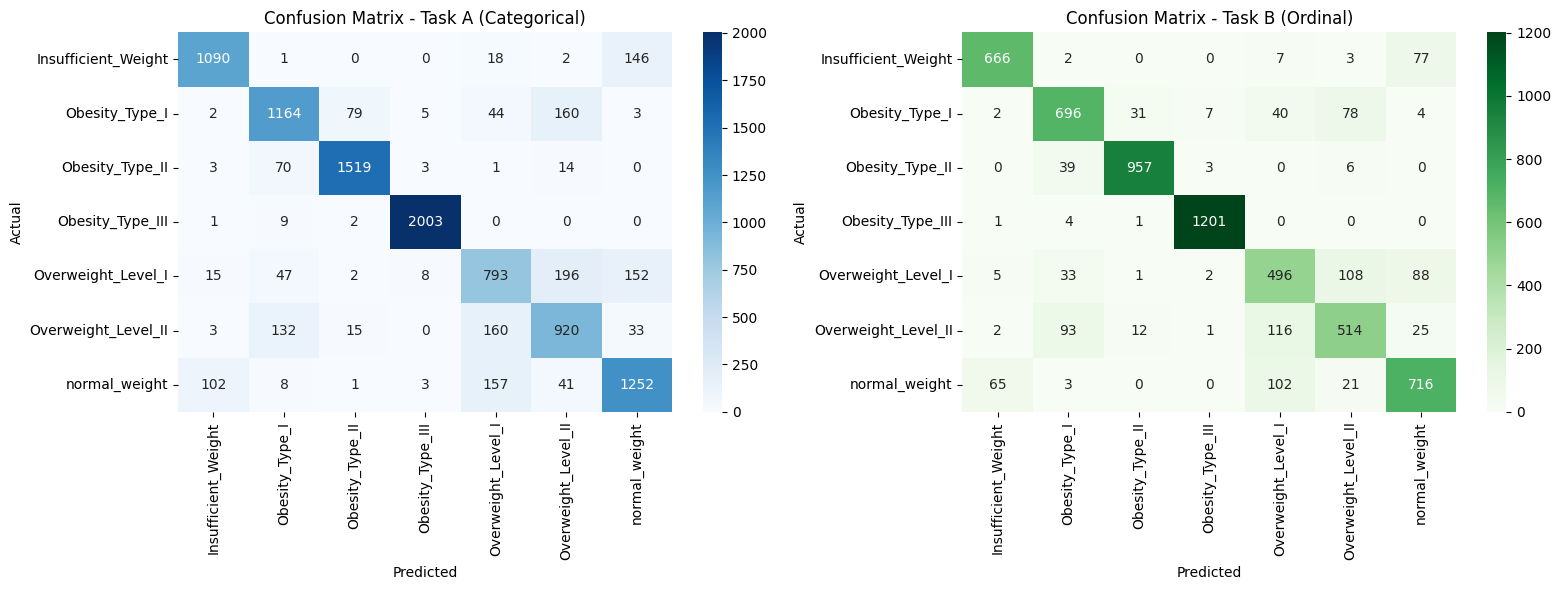

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Task A - Confusion Matrix (Categorical)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_, ax=ax[0])
ax[0].set_title('Confusion Matrix - Task A (Categorical)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Task B - Confusion Matrix (Ordinal)
sns.heatmap(conf_matrix_ord, annot=True, fmt='d', cmap='Greens', xticklabels=clf_ord.classes_, yticklabels=clf_ord.classes_, ax=ax[1])
ax[1].set_title('Confusion Matrix - Task B (Ordinal)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

n_nodes = dt_classifier.tree_.node_count
gini = dt_classifier.tree_.impurity
node_samples = dt_classifier.tree_.n_node_samples
children_left = dt_classifier.tree_.children_left
children_right = dt_classifier.tree_.children_right

tree_data = []

# Loop over each node and collect its data
for node in range(n_nodes):
    tree_data.append({
        'Node Index': node,
        'Gini Index': gini[node],
        'Samples': node_samples[node],
        'Left Child': children_left[node] if children_left[node] != -1 else 'Leaf',
        'Right Child': children_right[node] if children_right[node] != -1 else 'Leaf'
    })

# Convert the list of dictionaries into a DataFrame
gini_df = pd.DataFrame(tree_data)

# Display the Gini Index DataFrame
print(gini_df)
